In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# parametreleri belirle

In [2]:
mean_vib=300
mean_heat=500
mean_vib_dev=30
mean_heat_dev=50
n=1000

In [3]:
np.random.seed(42)
x1=np.random.normal(mean_vib,mean_vib_dev,(n,1))
x2=np.random.normal(mean_heat,mean_heat_dev,(n,1))

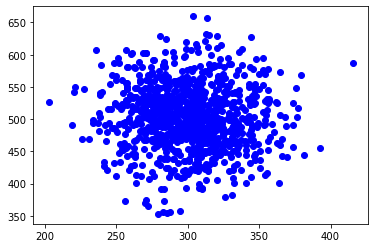

In [4]:
plt.scatter(x1,x2,color="blue")

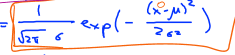

In [5]:
def Gaussian_pdf(x,mu,sigma):
#     n = np.array(x).shape[0]
#     mu = np.array(mu)
# #     sigma = np.array(sigma)
#     left = 1 / (2 * np.pi) ** (n / 2) / np.linalg.det(sigma) ** 0.5
#     right = np.exp(-1 / 2 * (x - mu) @ np.linalg.inv(sigma) @ (x - mu).T)
#     g = left * right
#     return g
    return (1./(((2.*np.pi)**0.5)*sigma))*(np.exp(-(x-mu)**2./(2.*sigma**2.)))
    # TODO : replace sigma with SIGMA 

In [6]:
X = np.random.randn(400, 12)

In [7]:
SIGMA = np.cov(X.T)

In [8]:
np.linalg.cond(SIGMA)

1.9531415156309202

In [9]:
Gaussian_pdf(X,X.mean(axis=0),X.std(axis=0))

array([[0.3048224 , 0.38803271, 0.30166174, ..., 0.26671857, 0.13316479,
        0.29521663],
       [0.28525156, 0.27913574, 0.26403619, ..., 0.39538804, 0.13128021,
        0.16416158],
       [0.00495699, 0.37325802, 0.07578797, ..., 0.36332271, 0.19667887,
        0.00872784],
       ...,
       [0.04381681, 0.34184455, 0.04021154, ..., 0.19118985, 0.24959225,
        0.28975471],
       [0.27772467, 0.35587527, 0.26521933, ..., 0.36542451, 0.21661367,
        0.20520016],
       [0.21171386, 0.28837762, 0.38426932, ..., 0.11893781, 0.39522005,
        0.19035748]])

In [10]:
# Gaussian_pdf(0,0,1

In [11]:
a=np.linspace(-50,50,1000)

pdf=Gaussian_pdf(a,0,8)
pdf

plt.plot(a,pdf,color="red")

In [12]:
x1.shape

(1000, 1)

In [13]:
px2=Gaussian_pdf(
    x2,
    np.array([[mean_heat]]),
    np.array([[mean_heat_dev]])
    )
px1=Gaussian_pdf(
    x1,
    np.array([[mean_vib]]),
    np.array([[mean_vib_dev]])
    )
px=px1*px2

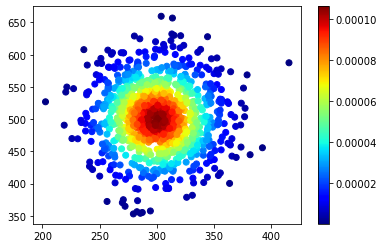

In [14]:
plt.scatter(x1,x2,c=px,cmap="jet")
plt.colorbar()

In [15]:
min(px)

array([1.37341993e-08])

In [16]:
y=(px<(10**(-6))).astype(int)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [17]:
y.mean()

0.005

# data set hazır density estimation

In [18]:
x1.mean()

300.57996167466973

In [19]:
x2.mean()

503.5418118624578

In [20]:
x1.std()

29.361786232420627

In [21]:
x2.std()

49.84777626473151

In [22]:
px1=Gaussian_pdf(x1,x1.mean(),x1.std())
px2=Gaussian_pdf(x2,x2.mean(),x2.std())

In [23]:
px=px1*px2

In [24]:
df=pd.DataFrame({"px":px.ravel(),"y":y.ravel()})
df.head()

,px,y
0,0.000040,0
1,0.000074,0
2,0.000088,0
3,0.000026,0
4,0.000086,0


In [25]:
df.sort_values(by=["y","px"],ascending=(False,True)).head(10)

,px,y
209,1.228842e-08,1
262,3.788811e-07,1
478,5.172962e-07,1
615,8.013623e-07,1
957,8.670573e-07,1
971,8.793684e-07,0
591,1.057667e-06,0
346,1.104343e-06,0
382,1.106638e-06,0
539,1.157205e-06,0


In [26]:
Epsilon=9.13e-7

In [27]:
y_pred=(px<Epsilon).astype(int)
# y_pred

In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score, confusion_matrix

In [29]:
precision_score(y,y_pred)

0.8333333333333334

In [30]:
recall_score(y,y_pred)

1.0

In [31]:
x1_new=np.random.normal(mean_vib,mean_vib_dev,1000)
x2_new=np.random.normal(mean_heat,mean_heat_dev,1000)

In [32]:
px1_new=Gaussian_pdf(x1_new,mean_vib,mean_vib_dev)
px2_new=Gaussian_pdf(x2_new,mean_heat,mean_heat_dev)
px_new=px1_new*px2_new

In [33]:
y_new=(px_new<10**-6).astype(int)

In [34]:
px1_pred=Gaussian_pdf(x1_new,x1.mean(),x1.std())
px2_pred=Gaussian_pdf(x2_new,x2.mean(),x2.std())
px_pred=px1_pred*px2_pred

In [35]:
y_pred_new=px_pred<Epsilon

In [36]:
precision_score(y_new,y_pred_new)

1.0

In [37]:
recall_score(y_new,y_pred_new)

1.0

In [38]:
1 / 2 * np.pi

1.5707963267948966

In [39]:
class Anomaly_Detector:
    def __init__(self):
        self.mu=None
        self.sigma=None
        self.Epsilon=None
    def fit(self,X,y):
        y=y.ravel()
        self.mu=X.mean(axis=0)
        self.sigma=X.std(axis=0)
        px=np.prod(Gaussian_pdf(X,self.mu,self.sigma),axis=1)
        self.Epsilon=px[y==0].min()-1e-9
        return self
    def predict(self,X):
        px=np.prod(Gaussian_pdf(X,self.mu,self.sigma),axis=1)
        y_pred=(px<self.Epsilon).astype(int)
        return y_pred
    def score(self,X,y):
        y_pred=self.predict(X)
        return recall_score(y,y_pred),precision_score(y,y_pred)

In [40]:
# b=np.random.randn(9,2)
# b.mean(axis=0)

In [41]:
# E=Gaussian_pdf(b,b.mean(axis=0),b.std(axis=0))
# np.prod(E,axis=1)

In [42]:
X=np.concatenate([x1,x2],axis=1)

In [43]:
model=Anomaly_Detector()

In [44]:
model.fit(X,y)

In [45]:
y_pred=model.predict(X)

In [46]:
model.score(X,y)

(1.0, 1.0)

In [47]:
X_new=np.array([x1_new,x2_new]).T
X_new.shape

(1000, 2)

In [48]:
model.score(X_new,y_new)

(0.9473684210526315, 1.0)

In [49]:
model.Epsilon

8.783684464501501e-07

In [50]:
from sklearn.model_selection import train_test_split as split

In [51]:
X_train,X_test,y_train,y_test=split(X,y,test_size=0.2)

In [52]:
def anomaly_split(X,y,test_size=0.2):
    y=y.ravel()
    y_pos=y[y==1]
    X_pos=X[y==1]
    y_neg=y[y==0]
    X_neg=X[y==0]
    len_pos=len(y_pos)
    kalan=len(X)*test_size-len_pos
    X_test=X_pos
    y_test=y_pos
    if kalan>0:
        X_neg_train,X_neg_test,y_neg_train,y_neg_test=split(X_neg,y_neg,test_size=(kalan/(len(X)-len_pos)))
        X_test=np.concatenate([X_test,X_neg_test])
        y_test=np.concatenate([y_test,y_neg_test])
        X_train=X_neg_train
        y_train=y_neg_train
    else:
        X_train,X_test,y_train,y_test=split(X,y,test_size=test_size)
    return X_train,X_test,y_train,y_test

In [53]:
X_train,X_test,y_train,y_test=anomaly_split(X,y,test_size=0.2)

In [54]:
X_test.shape

(200, 2)

In [55]:
y_test.sum()

5

In [56]:
model.fit(X_train,y_train)

In [57]:
model.score(X_test,y_test)

(1.0, 1.0)

In [58]:
model.score(X_new,y_new)

(1.0, 0.95)